In [1]:
import numpy as np
from matplotlib import pyplot as plt
from PIL import Image
import os

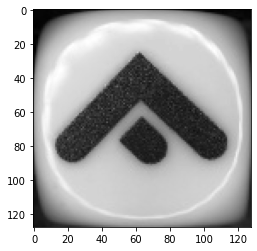

In [2]:
img = Image.open("../../data/train_set/08/16_09_21_08_020.png")
plt.imshow(img, cmap="gray")

In [3]:
img = np.array(img)

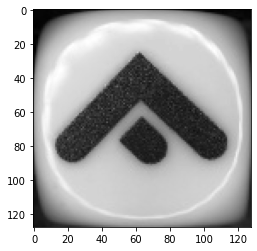

In [4]:
plt.imshow(img, cmap="gray")

In [5]:
img.shape

(128, 128)

In [6]:
print(img[0])

[ 15  15  15  15  15  15  15  14  13  15  15  16  17  16  16  19  17  17
  16  18  20  19  17  18  18  20  20  22  25  25  24  23  22  25  29  32
  36  44  54  60  72  78  86  92  98 104 109 112 115 117 120 122 125 126
 127 127 129 129 129 130 131 132 132 132 133 133 132 130 129 128 127 127
 123 123 123 122 120 116 112 109 105 102  96  89  83  75  67  60  51  44
  36  30  26  23  20  17  18  16  18  19  17  15  16  16  14  14  15  15
  13  13  14  13  12  14  16  17  16  18  18  16  15  13  13  13  12  12
  13  12]


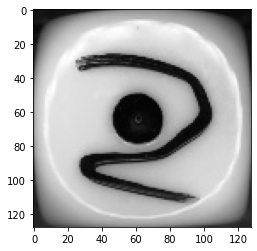

In [7]:
img = Image.open("../../data/train_set/ano/17_11_21_anomalies_000.png")
plt.imshow(img, cmap="gray")

In [8]:
def create_dataset():
    directory = "../../data/train_set/"
    data= []
    label= []
    for i in range(0, 10):
        for filename in os.listdir(directory+"0"+str(i)):
            if filename.endswith(".png"):
                img = Image.open(directory+"0"+str(i)+"/"+filename)
                data.append(np.array(img))
                label.append(i)
#             if len(data)% 100 ==0:
#                 break
    for filename in os.listdir(directory+"10"):
            if filename.endswith(".png"):
                img = Image.open(directory+"10/"+filename)
                data.append(np.array(img))
                label.append(10)
#             if len(data)% 100 ==0:
#                 break
    print(len(data))
    return data, label
            
        

In [9]:
data, labels= create_dataset()

6571


In [10]:
data[:10][1]

array([[81, 83, 83, ..., 39, 39, 39],
       [85, 85, 85, ..., 37, 38, 38],
       [89, 89, 87, ..., 36, 37, 39],
       ...,
       [28, 29, 31, ..., 67, 66, 65],
       [27, 29, 30, ..., 68, 68, 67],
       [26, 27, 28, ..., 67, 66, 66]], dtype=uint8)

In [11]:
data = np.array(data)
data.shape

(6571, 128, 128)

In [12]:
preprocessed_data = data/255
labels= np.array(labels).reshape(-1,1)

In [13]:
print("Drawings shape before : ", preprocessed_data.shape)
preprocessed_data = np.expand_dims(preprocessed_data, axis=3)
print("Drawings shape after : ", preprocessed_data.shape)
print("Label shape : ", labels.shape)

Drawings shape before :  (6571, 128, 128)
Drawings shape after :  (6571, 128, 128, 1)
Label shape :  (6571, 1)


In [14]:
# import pickle as pkl

# filename = '../../resources/CNN_Input'
# fileObject = open(filename, 'wb')

# pkl.dump(preprocessed_data, fileObject)
# fileObject.close()

# filename = '../../resources/CNN_labels'
# fileObject = open(filename, 'wb')
# pkl.dump(labels, fileObject)
# fileObject.close()

In [15]:
from sklearn.model_selection import train_test_split

# split data in train/val/test set
train_val_data, test_data, train_val_labels, test_labels = train_test_split(
    preprocessed_data, 
    labels,
    test_size=0.2, 
    random_state=42, 
    shuffle=True
)

train_data, val_data, train_labels, val_labels = train_test_split(
    train_val_data, 
    train_val_labels,
    test_size=0.3, 
    random_state=42, 
    shuffle=True
)

In [16]:
import tensorflow as tf
from tensorflow.keras import layers, models

# pixel width and height of our images
input_size = 28

# number of filters in the convnet layer
filters = 16

# conv net parameters
strides = (2, 2)
pool_size = (2,2)
kernel_size = (5, 5)

2022-02-03 14:21:08.701328: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-02-03 14:21:08.701490: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


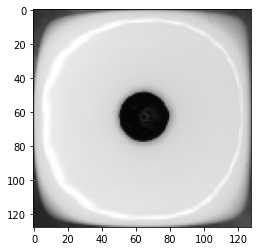

In [17]:
plt.imshow(preprocessed_data[400], cmap="gray")

In [18]:
model = tf.keras.Sequential(
    [
        layers.Conv2D(filters, kernel_size, activation = "relu", input_shape= (128,128, 1)),
        layers.MaxPool2D(pool_size=pool_size, strides= strides, padding='same'),
        layers.Conv2D(filters/2, kernel_size, activation = "relu"),
        layers.MaxPool2D(pool_size=pool_size, strides= strides, padding='same'),
        layers.Dropout(0.2), # dropout layer is there to defeat overfitting
        layers.Flatten(),
        layers.Dense(units=11),
    ]
)

# model.build()
model.summary()

2022-02-03 14:21:29.820299: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-02-03 14:21:29.820408: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-02-03 14:21:29.820494: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (venkys-pc): /proc/driver/nvidia/version does not exist
2022-02-03 14:21:29.841825: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 124, 124, 16)      416       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 62, 62, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 58, 58, 8)         3208      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 29, 29, 8)        0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 29, 29, 8)         0         
                                                                 
 flatten (Flatten)           (None, 6728)              0

In [19]:
model.compile(optimizer= tf.keras.optimizers.Adam(learning_rate= 0.00001), loss= tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics= ['accuracy'])

history = model.fit(x=train_data,y=train_labels, validation_data=(train_val_data, train_val_labels), epochs=5)

2022-02-03 14:21:30.756101: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 241106944 exceeds 10% of free system memory.


Epoch 1/5
115/115 [==============================] - ETA: 0s - loss: 2.3603 - accuracy: 0.1405

2022-02-03 14:22:13.970952: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 344457216 exceeds 10% of free system memory.


115/115 [==============================] - 55s 461ms/step - loss: 2.3603 - accuracy: 0.1405 - val_loss: 2.3136 - val_accuracy: 0.1684
Epoch 2/5
115/115 [==============================] - 52s 456ms/step - loss: 2.2601 - accuracy: 0.2381 - val_loss: 2.1943 - val_accuracy: 0.2553
Epoch 3/5
115/115 [==============================] - 52s 451ms/step - loss: 2.1106 - accuracy: 0.2737 - val_loss: 1.9930 - val_accuracy: 0.4167
Epoch 4/5
115/115 [==============================] - 52s 452ms/step - loss: 1.8521 - accuracy: 0.4479 - val_loss: 1.6720 - val_accuracy: 0.6419
Epoch 5/5
115/115 [==============================] - 53s 464ms/step - loss: 1.4790 - accuracy: 0.7546 - val_loss: 1.2486 - val_accuracy: 0.9397


In [20]:
model.evaluate(test_data, test_labels, verbose=0)

[1.251188039779663, 0.94068443775177]

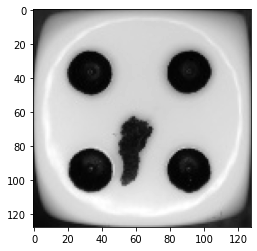

In [21]:
img = Image.open("../../data/train_set/ano/img_24868_cropped.jpg")
plt.imshow(img, cmap="gray")

In [22]:
prediction = model.predict(np.array(img).reshape(1, 128, 128, 1))
print(prediction)

[[-283.98575 -145.0779  -158.9331  -128.26054 -126.13558  168.74765
   143.6231  -450.26163 -513.8385  -499.06366 -488.07355]]


In [23]:
classes = np.argmax(prediction, axis = 1)
print(classes)

[5]


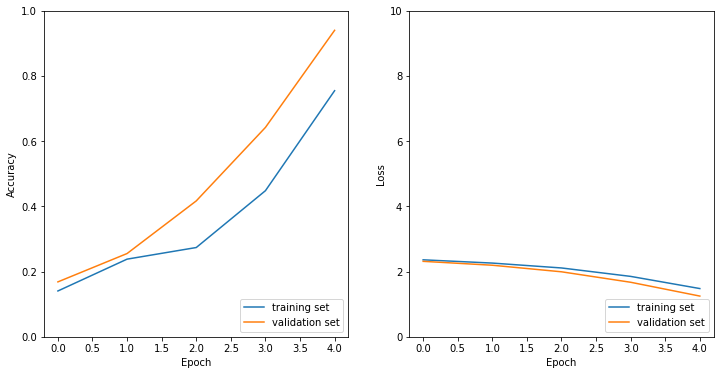

In [24]:
def plot_history(history):
    """ This helper function takes the tensorflow.python.keras.callbacks.History
    that is output from your `fit` method to plot the loss and accuracy of
    the training and validation set.
    """
    fig, axs = plt.subplots(1,2, figsize=(12,6))
    axs[0].plot(history.history['accuracy'], label='training set')
    axs[0].plot(history.history['val_accuracy'], label = 'validation set')
    axs[0].set(xlabel = 'Epoch', ylabel='Accuracy', ylim=[0, 1])

    axs[1].plot(history.history['loss'], label='training set')
    axs[1].plot(history.history['val_loss'], label = 'validation set')
    axs[1].set(xlabel = 'Epoch', ylabel='Loss', ylim=[0, 10])
    
    axs[0].legend(loc='lower right')
    axs[1].legend(loc='lower right')
    
plot_history(history)

In [25]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
pred_labels = model.predict(train_data).argmax(axis=1)
print(classification_report(train_labels, pred_labels))
confusion_matrix(train_labels, pred_labels)

2022-02-03 14:26:01.365931: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 241106944 exceeds 10% of free system memory.


              precision    recall  f1-score   support

           0       1.00      1.00      1.00       407
           1       1.00      0.98      0.99       305
           2       1.00      0.22      0.36       275
           3       0.98      1.00      0.99       337
           4       0.68      1.00      0.81       352
           5       0.92      1.00      0.96       512
           6       1.00      1.00      1.00       530
           7       1.00      1.00      1.00       240
           8       1.00      1.00      1.00       217
           9       1.00      1.00      1.00       281
          10       1.00      1.00      1.00       223

    accuracy                           0.94      3679
   macro avg       0.96      0.93      0.92      3679
weighted avg       0.96      0.94      0.93      3679



array([[407,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0, 299,   0,   6,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,  60,   0, 169,  46,   0,   0,   0,   0,   0],
       [  0,   0,   0, 337,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0, 352,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0, 511,   1,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0, 530,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0, 240,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0, 217,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0, 281,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 223]])

In [26]:
def create_test_dataset():
    directory = "../../data/test_set/"
    data= []
    label= []
    for i in range(0, 10):
        for filename in os.listdir(directory+"0"+str(i)):
            if filename.endswith(".png"):
                img = Image.open(directory+"0"+str(i)+"/"+filename)
                data.append(np.array(img))
                label.append(i)
            
    for filename in os.listdir(directory+"10"):
            if filename.endswith(".png"):
                img = Image.open(directory+"10/"+filename)
                data.append(np.array(img))
                label.append(10)
            
    print(len(data))
    return data, label

In [33]:
data_test, labels_test= create_test_dataset()

330


In [34]:
preprocessed_test_data = np.array(data_test)/255
labels_test= np.array(labels_test).reshape(-1,1)

In [35]:
model.evaluate(preprocessed_test_data, labels_test, verbose=0)

[1.3270612955093384, 0.9272727370262146]

In [36]:
print(test_labels[200])

[5]


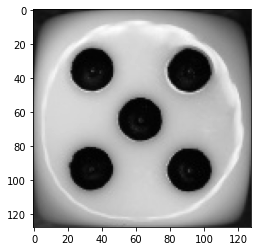

In [39]:
plt.imshow(preprocessed_test_data[200], cmap="gray")

In [40]:
prediction_test = model.predict(preprocessed_test_data[200].reshape(1, 128, 128, 1))
classes_test = np.argmax(prediction_test, axis = 1)
print(classes_test)

[6]
